In [1]:
%cd -q ../..

%load_ext autoreload
%autoreload 2

In [2]:

import json
import os
from collections import Counter, defaultdict
from pathlib import Path

import numpy as np
from dotenv import load_dotenv
from matplotlib import pyplot as plt

from scotus_metalang.diachronic_analysis import authors
from scotus_metalang.diachronic_analysis import summary_graphing

load_dotenv()
data_path = os.environ["SCOTUS_METALANG_DATA_PATH"]

In [3]:
opinions = []
for filepath in Path(f"{data_path}/cap/known_authors").glob("*/*.json"):
    with open(filepath, "r") as f:
        opinion = json.load(f)
        opinions.append(opinion)

In [59]:
import pandas as pd

In [73]:
scdb = pd.read_csv(f"{data_path}/scdb/SCDB_2023_01_justiceCentered_Docket.csv",
                   header=0, encoding="cp1252")
scdb = scdb[(scdb["term"] >= 1986) & (scdb["term"] <= 2018)]
scdb = scdb[scdb["docketId"].str.endswith("01")]

In [75]:
scdb[(scdb["term"] == 2006) & (scdb["opinion"] == 2.0)]

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
83351,2006-001,2006-001-01,2006-001-01-01,2006-001-01-01-01-01,10/20/2006,2,549 U.S. 1,127 S. Ct. 5,166 L. Ed. 2d 1,2006 U.S. LEXIS 8000,...,9,0,103,JPStevens,3.0,2.0,1.0,2.0,NaN,NaN
83369,2006-002,2006-002-01,2006-002-01-01,2006-002-01-01-01-01,10/13/2006,1,549 U.S. 7,127 S. Ct. 469,166 L. Ed. 2d 334,2006 U.S. LEXIS 8522,...,5,4,103,JPStevens,2.0,2.0,2.0,1.0,NaN,NaN
83370,2006-002,2006-002-01,2006-002-01-01,2006-002-01-01-01-02,10/13/2006,1,549 U.S. 7,127 S. Ct. 469,166 L. Ed. 2d 334,2006 U.S. LEXIS 8522,...,5,4,105,AScalia,3.0,2.0,1.0,2.0,NaN,NaN
83371,2006-002,2006-002-01,2006-002-01-01,2006-002-01-01-01-03,10/13/2006,1,549 U.S. 7,127 S. Ct. 469,166 L. Ed. 2d 334,2006 U.S. LEXIS 8522,...,5,4,106,AMKennedy,1.0,2.0,1.0,2.0,NaN,NaN
83381,2006-003,2006-003-01,2006-003-01-01,2006-003-01-01-01-04,12/5/2006,1,549 U.S. 47,127 S. Ct. 625,166 L. Ed. 2d 462,2006 U.S. LEXIS 9442,...,8,1,107,DHSouter,1.0,2.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84076,2006-073,2006-073-01,2006-073-01-01,2006-073-01-01-01-08,6/28/2007,1,551 U.S. 701,127 S. Ct. 2738,168 L. Ed. 2d 508,2007 U.S. LEXIS 8670,...,5,4,110,SGBreyer,2.0,2.0,2.0,1.0,NaN,NaN
84089,2006-074,2006-074-01,2006-074-01-01,2006-074-01-01-01-03,6/28/2007,1,551 U.S. 877,127 S. Ct. 2705,168 L. Ed. 2d 623,2007 U.S. LEXIS 8668,...,5,4,106,AMKennedy,1.0,2.0,1.0,2.0,NaN,NaN
84093,2006-074,2006-074-01,2006-074-01-01,2006-074-01-01-01-07,6/28/2007,1,551 U.S. 877,127 S. Ct. 2705,168 L. Ed. 2d 623,2007 U.S. LEXIS 8668,...,5,4,110,SGBreyer,2.0,2.0,2.0,1.0,NaN,NaN
84098,2006-075,2006-075-01,2006-075-01-01,2006-075-01-01-01-03,6/28/2007,1,551 U.S. 930,127 S. Ct. 2842,168 L. Ed. 2d 662,2007 U.S. LEXIS 8667,...,5,4,106,AMKennedy,1.0,2.0,2.0,2.0,NaN,NaN


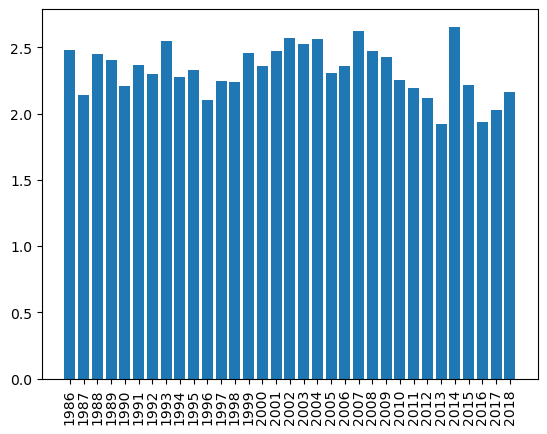

In [57]:
averages, fig = summary_graphing.plot_opinions_per_case_by_term(opinions)
fig

In [30]:
opinion_types_by_author = summary_graphing.get_opinion_types_by_author(opinions)
opinion_types_by_term = summary_graphing.get_opinion_types_by_term(opinions)

In [32]:
plt.ioff()

In [85]:
opinion_types_by_term["2006"]

Counter({'majority': 65,
         'dissent': 51,
         'concurrence': 39,
         'concurring-in-part-and-dissenting-in-part': 8})

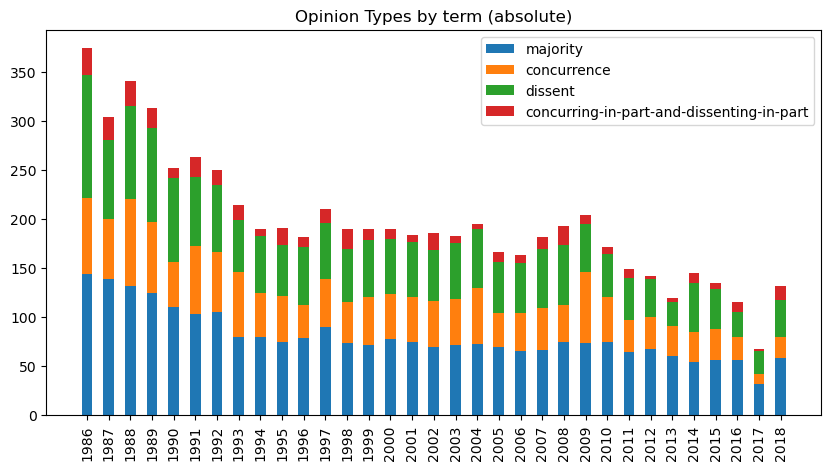

In [94]:
fig = summary_graphing.plot_opinion_types_by_term_abs(opinion_types_by_term)
fig.savefig("figures/opinion_types_by_term_absolute.pdf", bbox_inches="tight")
plt.show()

In [95]:
fig = summary_graphing.plot_opinion_types_by_term_norm(opinion_types_by_term)
fig.savefig("figures/opinion_types_by_term_normalized.pdf", bbox_inches="tight")
fig.clear()

In [96]:
fig = summary_graphing.plot_opinion_types_abs(opinion_types_by_author)
fig.savefig("figures/opinion_types_by_author_absolute.pdf", bbox_inches="tight")
fig.clear()

In [97]:
fig = summary_graphing.plot_opinion_types_norm(opinion_types_by_author)
fig.savefig("figures/opinion_types_by_author_normalized.pdf", bbox_inches="tight")
fig.clear()

In [74]:
type_counts = Counter([opinion["type"] for opinion in opinions])

In [83]:
def reorder_dict(d, ordered_keys):
    for k in d:
        assert k in ordered_keys
    return {k: d[k] for k in ordered_keys}

In [82]:
author_counts = Counter([opinion["author"] for opinion in opinions])
author_counts = reorder_dict(author_counts, authors.ORDERED_JUSTICES)
author_counts

{'brennan': 175,
 'white': 226,
 'marshall': 157,
 'blackmun': 250,
 'powell': 41,
 'rehnquist': 323,
 'stevens': 888,
 'oconnor': 453,
 'scalia': 848,
 'kennedy': 523,
 'souter': 359,
 'thomas': 628,
 'ginsburg': 439,
 'breyer': 499,
 'roberts': 160,
 'alito': 245,
 'sotomayor': 155,
 'kagan': 81,
 'gorsuch': 24,
 'kavanaugh': 10}

In [28]:
scdb_id_counts = Counter()
for opinion in opinions:
    scdb_id = opinion["scdb_id"]
    assert scdb_id is not None
    scdb_id_counts[scdb_id] += 1

In [29]:
# Cases with n opinions
Counter(scdb_id_counts.values())

Counter({2: 986, 1: 740, 3: 637, 4: 268, 5: 100, 6: 41, 7: 5, 8: 1})

In [31]:
scdb_ids = set([opinion["scdb_id"] for opinion in opinions])

In [37]:
len(scdb_ids) #  cases


2778

In [38]:
len(opinions)  # opinions

6484

In [ ]:
author_opinion_counts = Counter()
for opinion in op

In [8]:
opinions_by_author = {}
docket_numbers = set()
for author in authors.ORDERED_JUSTICES:
    opinion_paths =list(Path(f"data/cap/known_authors/{author}/").glob("*.json"))
    num_opinions = len(opinion_paths)
    for opinion_path in opinion_paths:
        docket_numbers.add(opinion_path.name)

    opinions_by_author[author] = num_opinions


brennan & 163 & 1956 & 1990\\
white & 215 & 1962 & 1993\\
marshall & 141 & 1967 & 1991\\
blackmun & 234 & 1970 & 1994\\
powell & 34 & 1972 & 1987\\
rehnquist & 306 & 1972 & 2005\\
stevens & 789 & 1975 & 2010\\
oconnor & 437 & 1981 & 2006\\
scalia & 758 & 1986 & 2016\\
kennedy & 501 & 1988 & 2018\\
souter & 329 & 1990 & 2009\\
thomas & 558 & 1991 & 2100\\
ginsburg & 398 & 1993 & 2020\\
breyer & 451 & 1994 & 2022\\
roberts & 137 & 2005 & 2100\\
alito & 188 & 2006 & 2100\\
sotomayor & 140 & 2009 & 2100\\
kagan & 71 & 2010 & 2100\\
gorsuch & 30 & 2017 & 2100\\
kavanaugh & 21 & 2018 & 2100\\


In [40]:
for author in authors.ORDERED_JUSTICES:
    num_opinions = author_counts[author]
    term_start = authors.ORDERED_JUSTICES[author][0]
    term_end = authors.ORDERED_JUSTICES[author][1]
    print(f"{author} & {num_opinions} & {term_start} & {term_end}\\\\")

brennan & 175 & 1956 & 1990\\
white & 226 & 1962 & 1993\\
marshall & 157 & 1967 & 1991\\
blackmun & 250 & 1970 & 1994\\
powell & 41 & 1972 & 1987\\
rehnquist & 323 & 1972 & 2005\\
stevens & 888 & 1975 & 2010\\
oconnor & 453 & 1981 & 2006\\
scalia & 848 & 1986 & 2016\\
kennedy & 523 & 1988 & 2018\\
souter & 359 & 1990 & 2009\\
thomas & 628 & 1991 & 2100\\
ginsburg & 439 & 1993 & 2020\\
breyer & 499 & 1994 & 2022\\
roberts & 160 & 2005 & 2100\\
alito & 245 & 2006 & 2100\\
sotomayor & 155 & 2009 & 2100\\
kagan & 81 & 2010 & 2100\\
gorsuch & 24 & 2017 & 2100\\
kavanaugh & 10 & 2018 & 2100\\


In [17]:
print(f"{len(opinions_by_author)} total justices")
print(f"{len(docket_numbers)} total cases")
print(f"{sum(opinions_by_author.values())} total opinions")

20 total justices
2693 total cases
5901 total opinions


In [76]:
ops_2006 = []
for opinion in opinions:
    if opinion["term"] == "2006":
        ops_2006.append(opinion)

Counter({'majority': 65,
         'dissent': 51,
         'concurrence': 39,
         'concurring-in-part-and-dissenting-in-part': 8})

In [69]:
opinion_types_by_author = defaultdict(Counter)
for author in authors.ORDERED_JUSTICES:
    for opinion in opinions:
        author = opinion["author"]
        op_type = opinion["type"]
        if op_type in ["majority", "concurrence", "dissent", "concurring-in-part-and-dissenting-in-part"]:
            opinion_types_by_author[author][op_type] += 1

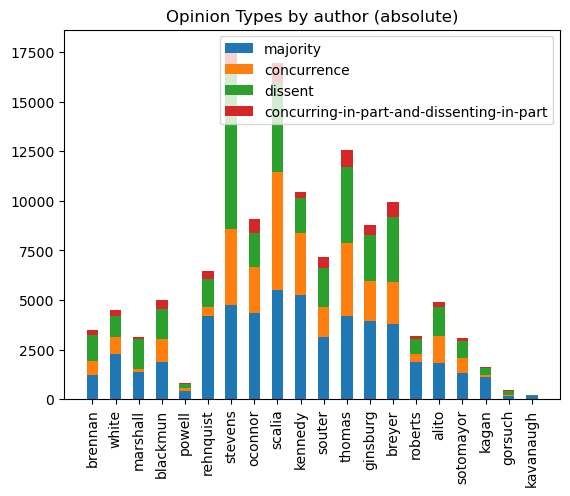

In [72]:
width = .5
bottom = np.zeros(len(authors.ORDERED_JUSTICES))
auths = list(authors.ORDERED_JUSTICES.keys())
for category in ["majority", "concurrence", "dissent", "concurring-in-part-and-dissenting-in-part"]:
    vals = [opinion_types_by_author[author].get(category, 0) for author in authors.ORDERED_JUSTICES]
    plt.bar(auths, vals, width = .5, label=category,
            bottom=bottom)
    bottom += vals

plt.xticks(rotation=90)
plt.legend()
plt.title("Opinion Types by author (absolute)")
plt.savefig("figures/opinion_types_by_author_absolute.pdf")
plt.show()

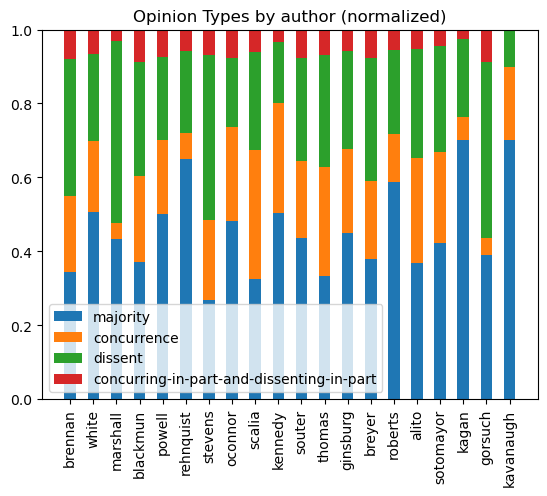

In [73]:
width = .5
bottom = np.zeros(len(authors.ORDERED_JUSTICES))
auths = list(authors.ORDERED_JUSTICES.keys())

for category in ["majority", "concurrence", "dissent", "concurring-in-part-and-dissenting-in-part"]:
    totals = [sum(opinion_types_by_author[author].values()) for author in authors.ORDERED_JUSTICES]
    vals = [opinion_types_by_author[author].get(category, 0) for author in authors.ORDERED_JUSTICES]
    ratios = [(v / t) for v, t in zip(vals, totals)]
    plt.bar(auths, ratios, width = .5, label=category,
            bottom=bottom)
    bottom += ratios

plt.xticks(rotation=90)

plt.legend()
plt.ylim(0, 1)
plt.title("Opinion Types by author (normalized)")
plt.savefig("figures/opinion_types_by_author_normalized.pdf")
plt.show()

In [ ]:
# Tokens per opinion
# Number of opinions
# Focal terms over time

How many cases total?

How many opinions per case on average?

How many opinions per year?

How many cases per year?

Ratio of opinion types per author